<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Перед началом работы импортируем библиотеку pandas и matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Приступим к знакомству с данными. Для начала загрузим предоставленный файл с выгрузкой и ознакомимся с первыми 5-ю строками. Сохраним датасет в переменную data для удобства. Далее с помощью атрибута info() ознакомиися с информацией.

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t' , decimal='.')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' , decimal='.')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Согластно предоставленным данным от коллег приведем расшифровку столбцов.

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данном датафрейме 23 699 строк. Более чем в половине столбцов имеются пропущенные значения. Далее часть из них прийдется заменить на соответсвующие значения, а часть не трогать вовсе, чтобы не потерять полезные данные.

## Предобработка данных

На данном этапе проанализируем более продробно пропущенные значения.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для начала обратим внимание на столбец balcony. Около половины данных пропущено. Проверим, какие значения встречаются в данном столбце.

In [5]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Вероятно наличие пропусков связано с тем, что у предлагаемой недвижимости нет балконов. Поэтому данные значения можно заменить на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Проверим, что замена произведена успешно.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В представленной таблице  столбец is_apartment, который по описанию является булевым, но определяется как object. Проверим уникальные значения в данном столбце.

In [8]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Заменим пропущенные значения на `False`

In [9]:
data['is_apartment'].fillna('False')
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Проверим столбец, отвечающий за высоту потолков.

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В данном столбце имеются аномальные значения, которые выбиваются из всех данных (от 10 до 100). Проверим их количество. 

In [11]:
data.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

Аномальные значения встречаются достаточно редко. На данном этапе не будем их заменять, так как далее они могут пригодится при дальнейшем анализе в графиках и гистограммах. По скольку разброс данных достаточно большой, заменим пропущенныне значения на медианные.

In [12]:
med_height = data['ceiling_height'].median() 
data['ceiling_height'] = data['ceiling_height'].fillna(med_height) 

Рассмотрим столбец, отвечающий за название населенного пункта locality_name.

In [13]:
data.groupby('locality_name')['locality_name'].count()

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 364, dtype: int64

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Так как пропущенных значений 49 в данном столбце, то заманим пропуски на значение "Другое"

In [15]:
data['locality_name'] = data['locality_name'].fillna('Другое')

Также в данном столбце имеется как миминмум 1 неявный дубликат 'посёлок Пансионат Зелёный Бор'. Вероятно вызван тем, что каждый арендодатель выбирает свою букву. Произведем замену к единому стилю.

In [16]:
data['locality_name'] = data['locality_name'].replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')

Рассмотрим столбец с максимальным количеством этажей.

In [17]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Так как пропущенные значения представляют собой незначительну долю, избавимся от них.

In [18]:
data = data.dropna(subset= ['floors_total']) #удаление пропущенных значений из столбца с количеством этажей.
data['floors_total'].unique() 

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Остальные столбцы с пропущенными значениями пока трогать не будем, так как их вклад достаточно высок. Проверим наличие явных дубликатов и при необходимости избавимся от них.

In [19]:
data.duplicated().sum()

0

Проанализировав таблицу видно, что у части данных их тип не корректен: максимальное количетсво этажей (его нужно превести в целочисленный формат), является ли аппартаментом (нужно привести к булеву типу, а в таблице указан как object) Поэтому приедем некоторые столбцы к корректному типу данных.

In [20]:
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  int64  
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

In [21]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

По результатам предобработки данных, произведена замена пропущенных значений в ряде столбцов. В зависимотии от типа данных пропущенные значения заменялись на среднее/медиану, 0, либо удалялись. Пропуски в данном случае могли быть вызваны как человеческим фактором, так и спецификой выгрузки данных.

В остальных столбцах пустые значения не были удалены/заменены, так как в далее это может повлиять на конечный результат в анализе данных.

## Расчёты и добавление результатов в таблицу

Перед проведением исследовательского анализа данных добавим в таблицу следующую инфмормацию: цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Добавим в таблицу столбцы price_for_sq_meter (цена квадратного метра), living_sq_share (соотношение общей и жилой площади), kitchen_sq_share (отношение площади кухни к общей)

In [22]:
data['price_for_sq_meter'] = data['last_price']/data['total_area']
data['living_sq_share'] = data['living_area']/data['total_area']
data['kitchen_sq_share'] = data['kitchen_area']/data['total_area']

Добавим в таблицу столбцы по дню недели, месяцу и году публикации объявления.

In [23]:
#приведем столбец с датой публикации к формату даты_времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
#добавим столбцы с днем, месяцем и годом публикации объявлнений
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,living_sq_share,kitchen_sq_share,day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018


Приведем категоризацию данных по этажам. Примим 3 основные категори:

-первый

-последний

-другой

In [24]:
#напишем функицю, которая будет категоризировать этажи согласно нашим критериям
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другое'
    except:
        return 'error'

Добавим столбец с типом этажа type_floor

In [25]:
data['type_floor'] = data.apply(floor_category, axis = 1)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,living_sq_share,kitchen_sq_share,day,month,year,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другое
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другое
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,True,...,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015,другое
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другое
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,55.0,95065.789474,0.473684,0.299342,0,9,2018,другое
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,155.0,99195.710456,0.284182,0.386059,3,11,2017,другое
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,True,...,0.0,NaN,NaN,110544.692737,NaN,0.263966,3,4,2019,другое
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,189.0,87454.764777,0.465320,0.265682,2,5,2018,другое
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,289.0,88524.590164,0.714754,0.106557,6,2,2017,другое


### Вывод

По результатам проведенных расчетов добавленны новые столбцы в исходну таблицу, а именно площадь квадратного метра, отнощение жилой площади к общей, отношение площади кухни к общей, дата продади с разбивкой по дням, месяцам, годам.

Данные метртики позвоялют произвести более глубокий аналилиз определению факторов, влияющих на стоимость жилья. 

## Исследовательский анализ данных

***Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим для каждого параметра гистограму***

In [26]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

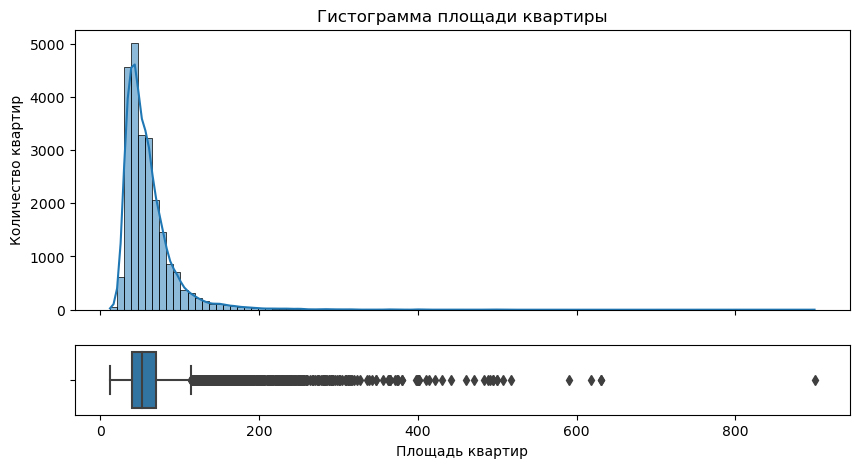

In [27]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='total_area',bins = 100, 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма площади квартиры',
     ylabel='Количество квартир')
sns.boxplot(data=data, x='total_area', ax=axs_box)\
.set(xlabel='Площадь квартир');

Так как после 200 м2 идут выбросы, то ограничим площади до 200 м2.

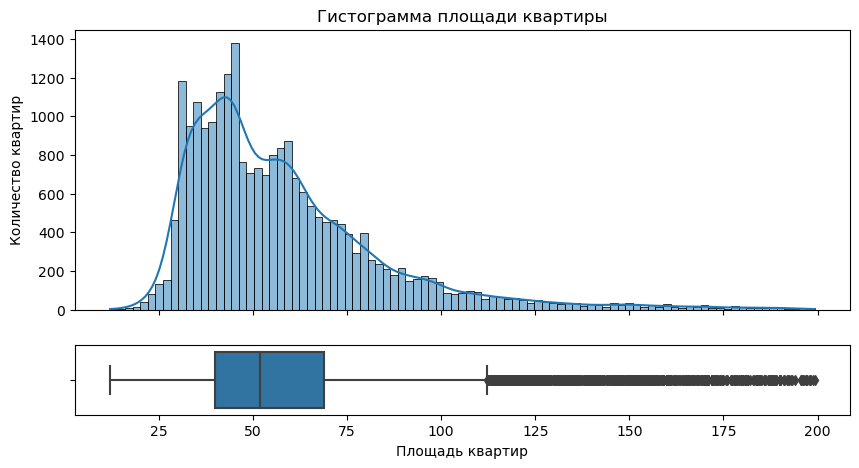

In [28]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data[data['total_area'] < 200], x='total_area', 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма площади квартиры',
     ylabel='Количество квартир')
sns.boxplot(data=data[data['total_area'] < 200], x='total_area', ax=axs_box)\
.set(xlabel='Площадь квартир');

По предварительным данным чаще всего встречаются квартиры с площадью от 30 до 70 м^2. При этом чаще всего встречаются около 50 м^2.

In [29]:
data['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

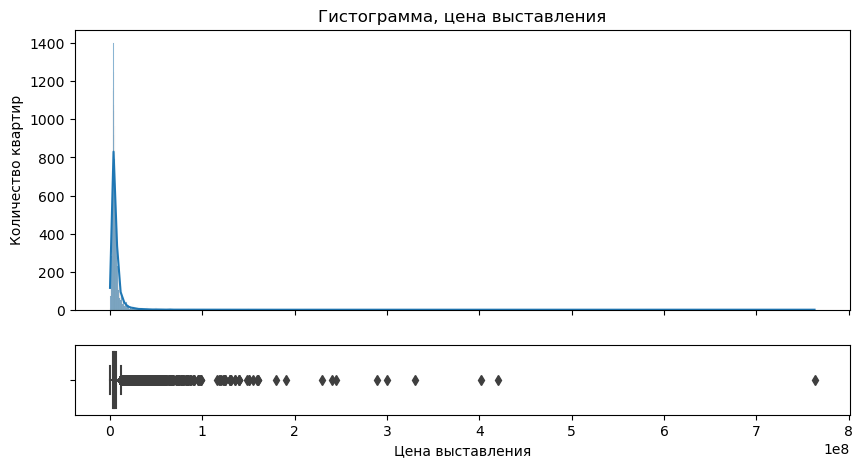

In [30]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='last_price',
             kde=True, ax=axs_hist)\
.set(title='Гистограмма, цена выставления',
     ylabel='Количество квартир')
sns.boxplot(data=data, x='last_price', ax=axs_box)\
.set(xlabel='Цена выставления');

<Axes: >

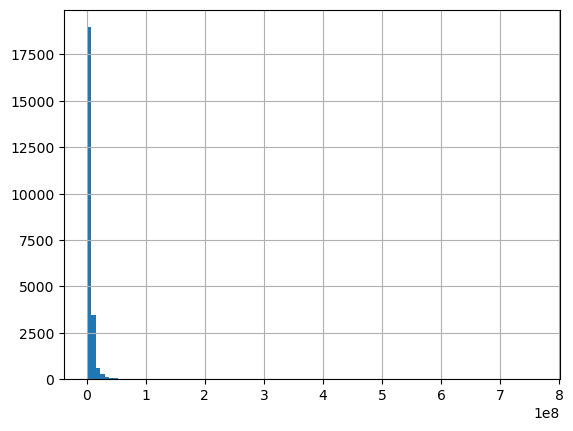

In [31]:
#гистограмма цены 
data['last_price'].hist(bins = 100)

Данные приведены в масштабе 10^8 степени и они не читаемы. Мы видим зашкаливающий пик у 0. Попробуем уменьшить масштаб.

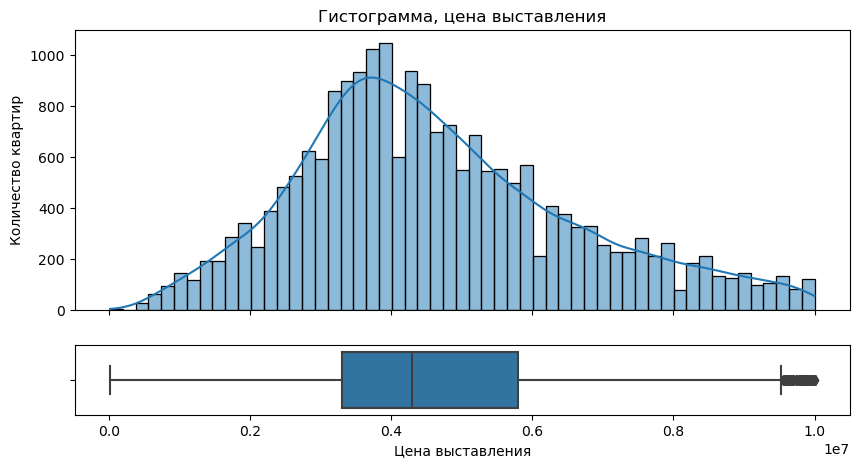

In [32]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data[data['last_price'] < 1e7], x='last_price', 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма, цена выставления',
     ylabel='Количество квартир')
sns.boxplot(data=data[data['last_price'] < 1e7], x='last_price', ax=axs_box)\
.set(xlabel='Цена выставления');

Средняя стоимось квартиры от 3 до 6 млн.

In [33]:
data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [34]:
len(data['rooms'].unique())

17

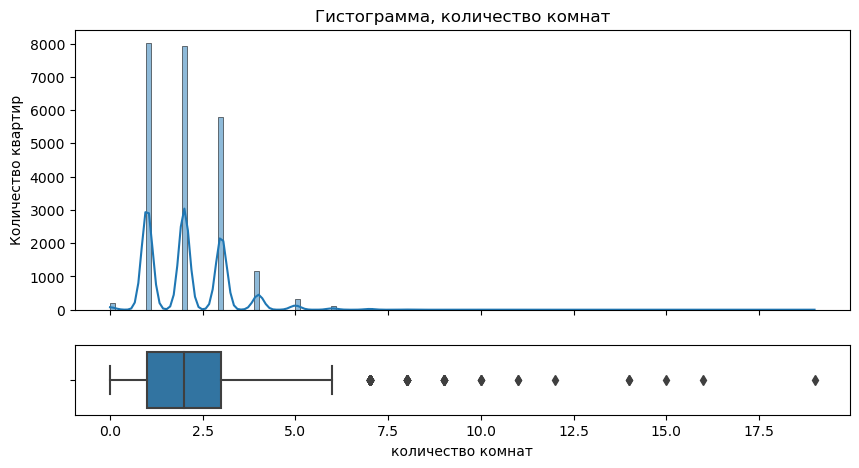

In [35]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='rooms', 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма, количество комнат',
     ylabel='Количество квартир')
sns.boxplot(data=data, x='rooms', ax=axs_box)\
.set(xlabel='количество комнат');

Чаще всего встречаются 1, 2, 3 комнатные квартиры, остальные варианты реже.

In [36]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

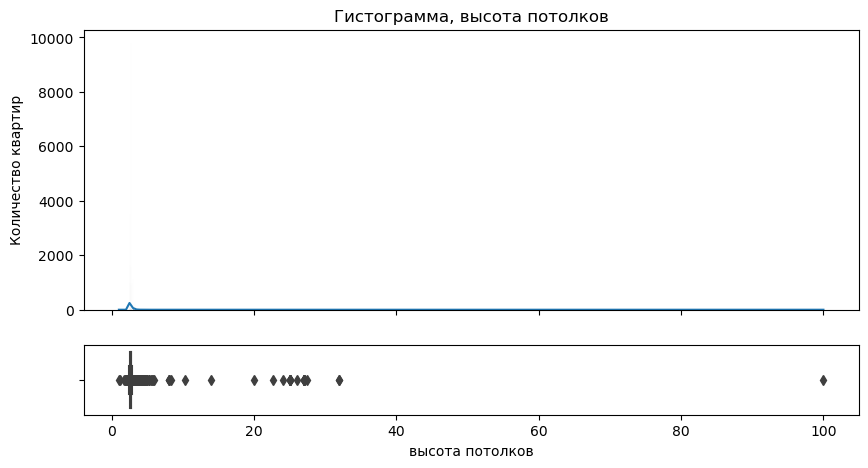

In [37]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='ceiling_height', 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма, высота потолков',
     ylabel='Количество квартир')
sns.boxplot(data=data, x='ceiling_height', ax=axs_box)\
.set(xlabel='высота потолков');

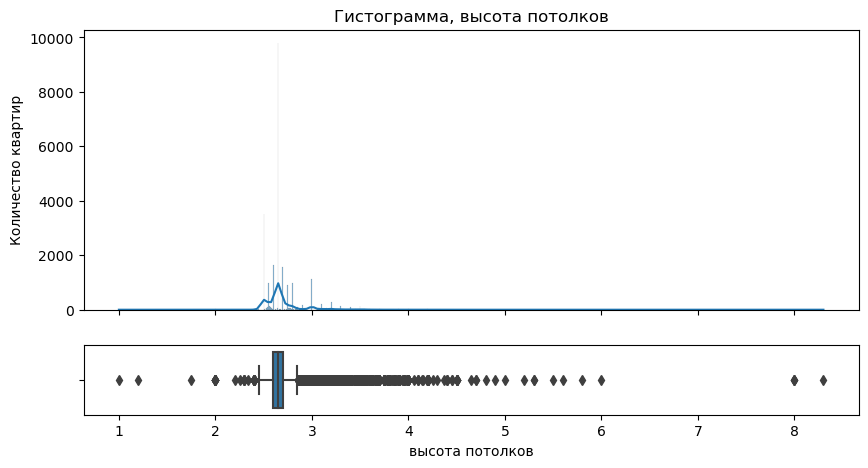

In [38]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data[data['ceiling_height'] <10], x='ceiling_height', 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма, высота потолков',
     ylabel='Количество квартир')
sns.boxplot(data=data[data['ceiling_height'] <10], x='ceiling_height', ax=axs_box)\
.set(xlabel='высота потолков');

Чаще всего встречаются квартиры с высотой потолков порядка 2,7 м.

Проверим, как много времени занимает продажа квартиры.

In [39]:
data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

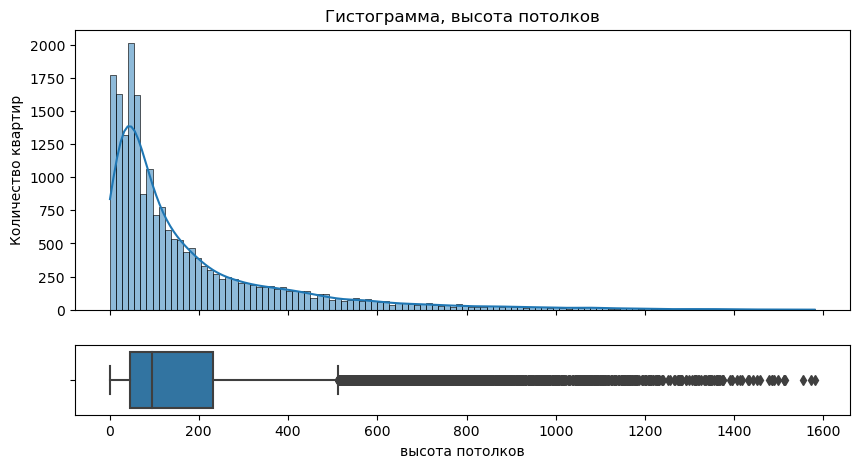

In [40]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='days_exposition', 
             kde=True, ax=axs_hist)\
.set(title='Гистограмма, высота потолков',
     ylabel='Количество квартир')
sns.boxplot(data=data, x='days_exposition', ax=axs_box)\
.set(xlabel='высота потолков');

Расчитаем медиану

In [41]:
data['days_exposition'].mean()

180.88483929357665

Из данных видно, что среднее значение времени продажи 180 дней, медианное - 95 дней. 

Быстрая продажа 45 дней.
Медленная продажа 232 дней
При этом стоит отметить, что аномалльными выглядит время продажи квартиры в 1 день и более 800 дней. Если количество дней после 1000 становится меньше, то данных около 1 дня много. Проверим долю продаж за 1 день.

In [42]:
display(len(data.query('days_exposition == 1')) / len(data))

4.234955321221361e-05

Данных значительно меньше 1 процента. Проверим комбинации срезов, при которых аномальные значения не будут превышать 1 %, чтобы не нарушить целостность картины.

In [43]:
display(len(data.query('days_exposition >= 1 and days_exposition <= 2')) / len(data))

0.00016939821284885445

In [44]:
display(len(data.query('days_exposition >= 1 and days_exposition <= 3')) / len(data))

0.00016939821284885445

In [45]:
display(len(data.query('days_exposition >= 1 and days_exposition <= 4')) / len(data))

0.014271799432515987

При срез данных от 1 до 3 дней составляет менее 1 %. Предположим, что это выброс и избавимся от него. Также мы видим в исодной гистограмме, что значения после 1400 практически неразличимы. Поэтому ограничим наши данные от 3 до 1400 дней и далее построим обновленные гистограммы.

<Axes: >

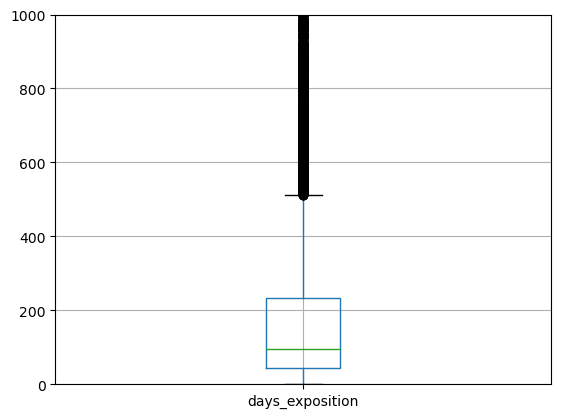

In [46]:
plt.ylim(0,1000)
data.boxplot('days_exposition')

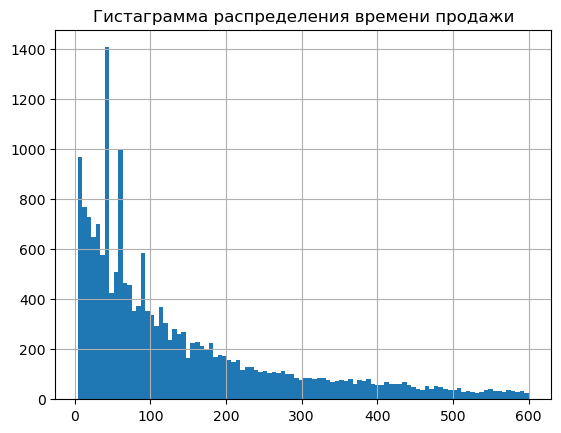

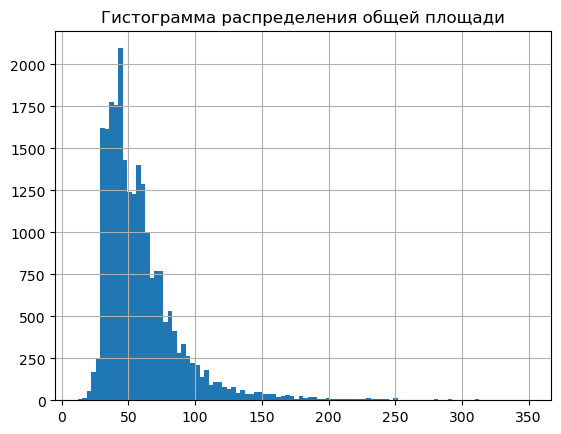

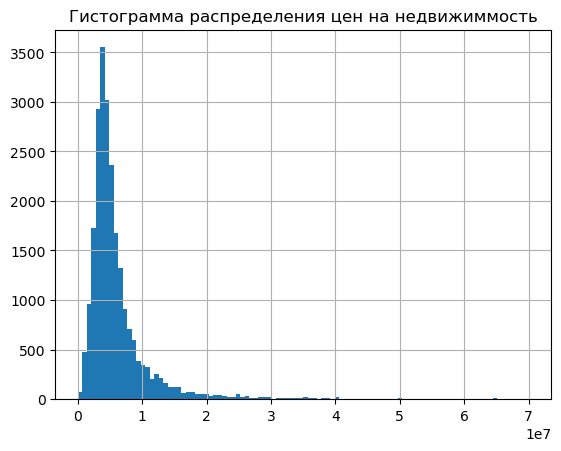

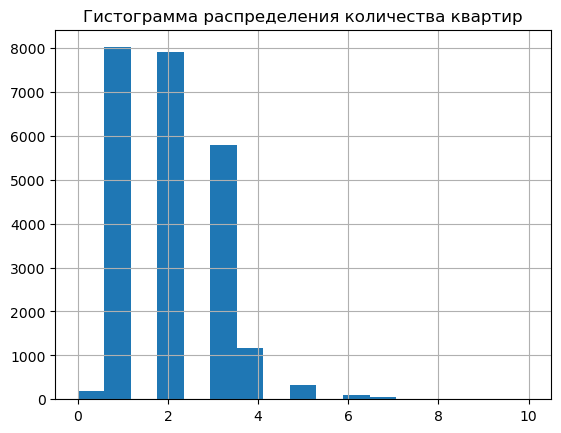

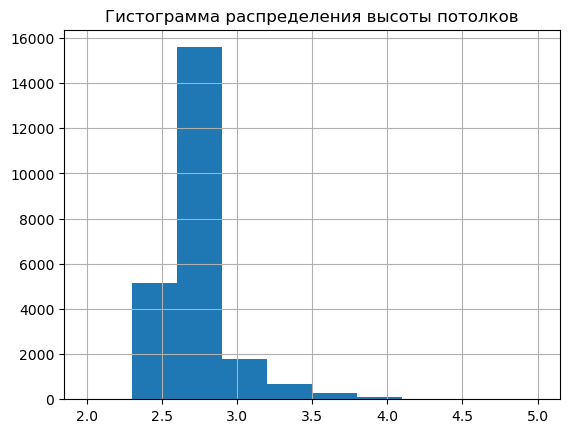

In [47]:
data['days_exposition'].hist(bins = 100, range = (4,600))
plt.title('Гистаграмма распределения времени продажи')
plt.show()
data['total_area'].hist(bins = 100,range=(12,350))
plt.title('Гистограмма распределения общей площади')
plt.show()
data['last_price'].hist(bins = 100, range = (0, 7e7))
plt.title('Гистограмма распределения цен на недвижиммость')
plt.show()
data['rooms'].hist(bins = 17,range=(0,10))
plt.title('Гистограмма распределения количества квартир')
plt.show()
data['ceiling_height'].hist(bins = 10,range=(2,5))
plt.title('Гистограмма распределения высоты потолков')
plt.show()

In [48]:
data[['days_exposition', 'total_area', 'last_price', 'rooms','ceiling_height']].describe()

,days_exposition,total_area,last_price,rooms,ceiling_height
count,20441.000000,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,180.884839,60.340678,6.540555e+06,2.071147,2.724581
std,219.685543,35.648988,1.090172e+07,1.078380,0.990085
min,1.000000,12.000000,1.219000e+04,0.000000,1.000000
25%,45.000000,40.000000,3.400000e+06,1.000000,2.600000
50%,95.000000,52.000000,4.650000e+06,2.000000,2.650000
75%,232.000000,69.800000,6.799000e+06,3.000000,2.700000
max,1580.000000,900.000000,7.630000e+08,19.000000,100.000000


***Проверим зависит ли цена от площади, числа комнат, удалённости от центра****


In [49]:
print(data['last_price'].corr(data['total_area'])) #зависимость цены от площади
print(data['last_price'].corr(data['rooms'])) #зависимость цены от числа комнат
print(data['last_price'].corr(data['cityCenters_nearest'])) #зависимость цены от удаленности от центра

0.6535810085611219
0.3631241665984551
-0.20621265675129588


Имеется слабая линейная зависимость между ценой и площадью квартиры. При этом линейная зависимость цены от количества комнат или друг с другом практически отсутствует. Дополнительно проверим данные зависимости, построив графики. 
    

Text(0, 0.5, 'Средняя цена')

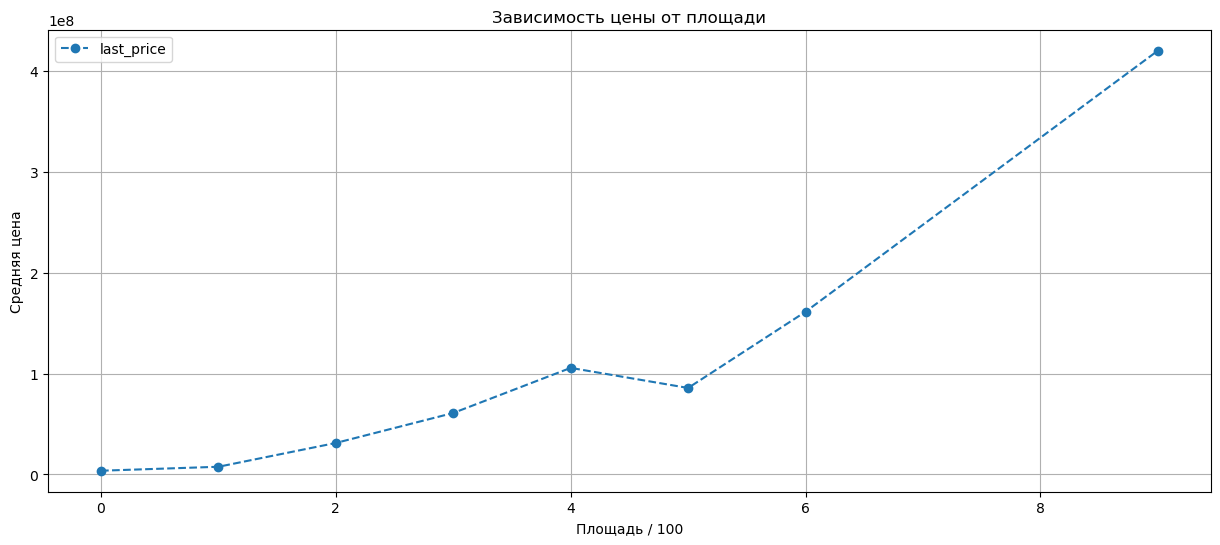

In [50]:
df = data.copy()

df.total_area = (df.total_area / 100).round()

df.pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Зависимость цены от площади')
plt.xlabel('Площадь / 100')
plt.ylabel('Средняя цена')

Из графики видно, что при увеличении площади недвижимости выростает средняя цена. Чем больше площадь, тем дороже недвижимость.

теперь проверим взаимосвязь между ценой за недвижимость и количеством комнат.

Text(0, 0.5, 'Средняя цена')

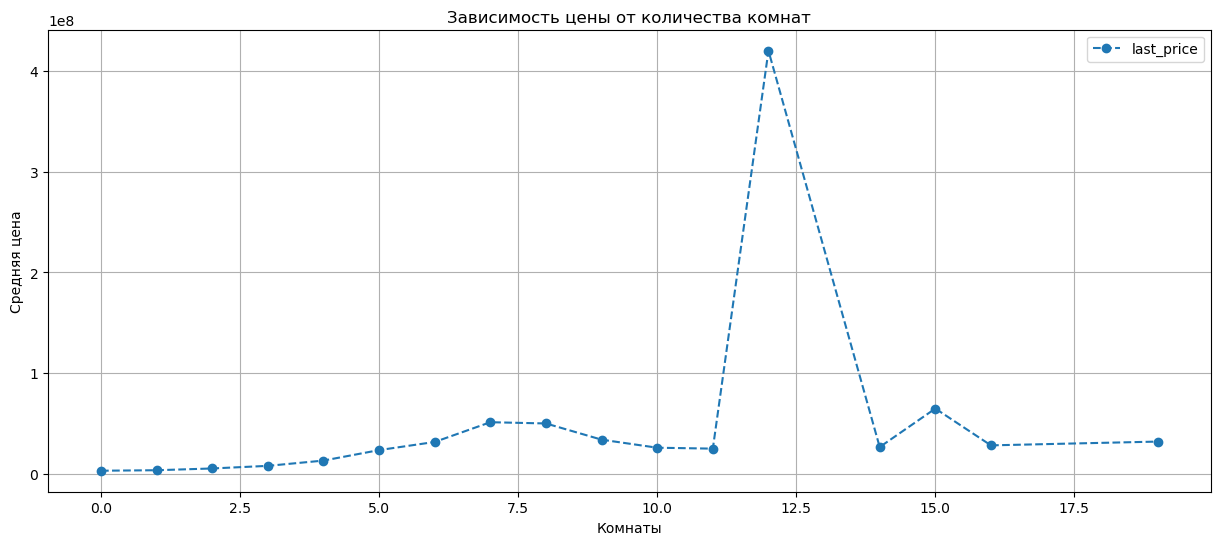

In [51]:
df_1 = data.copy()

df_1.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Зависимость цены от количества комнат')
plt.xlabel('Комнаты')
plt.ylabel('Средняя цена')

При увеличении количества комнат наблюдается тренд, к увеличению цены за квартиру. В данном случае имеется аномальное значение  квартира из 12 комнат, но это скорее аномальное значение, или очень подозрительная недвижимость. 

Проверим зависимость между ценой недвижимости и расстояния до центра.

Text(0, 0.5, 'Средняя цена')

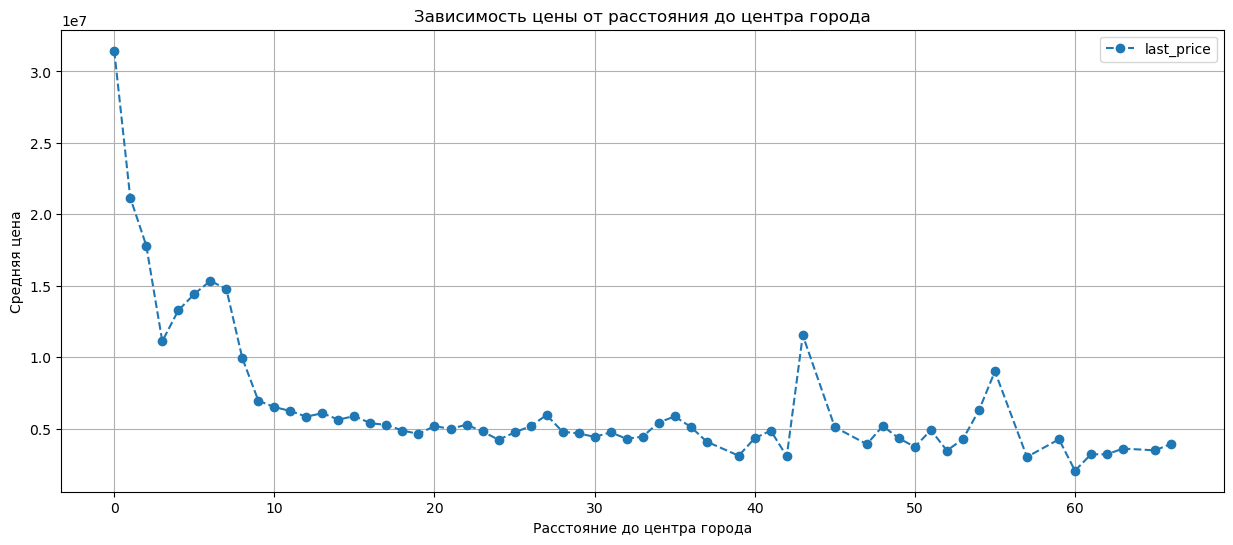

In [52]:
df_2 = data.copy()

df_2.cityCenters_nearest = (df.cityCenters_nearest / 1000).round() #перевел расстояние до центра из метров в киллометры.

df_2.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Зависимость цены от расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Средняя цена')

Из построинного графика видно, что чем ближе недвижимость находится к центру города, тем выше ее стоимость. Особенно резкий рост наблюдается при расстоянии менее 7 км. Можно предположить, что радиус центра города составляет порядка 7 км.

***Проверим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.***

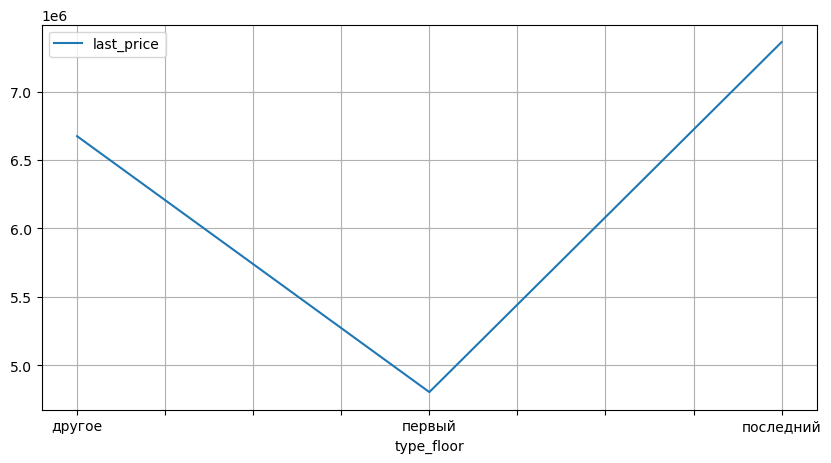

In [53]:
(
    data.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, figsize=(10, 5))
) 

plt.show()

Вывод. Квартиры на первом этаже стоят дешевле всего. при этом квартиры на последнем этаже стоят дороже всего.

In [54]:
#print(data['last_price'].corr(data['type_floor']))

***Проверим  зависимость цены от даты размещения: дня недели, месяца и года.***

In [55]:
print(data['last_price'].corr(data['day'])) #зависимость цены от дня недели
print(data['last_price'].corr(data['month'])) #зависимость цены от месяца
print(data['last_price'].corr(data['year'])) #зависимость цены от года

0.0012947242289498427
0.00276523265748841
-0.04302312009925644


Линейно зависимости от даты нет. Необходимо проверить данную зависимость построив графики.

Text(0, 0.5, 'Средняя цена')

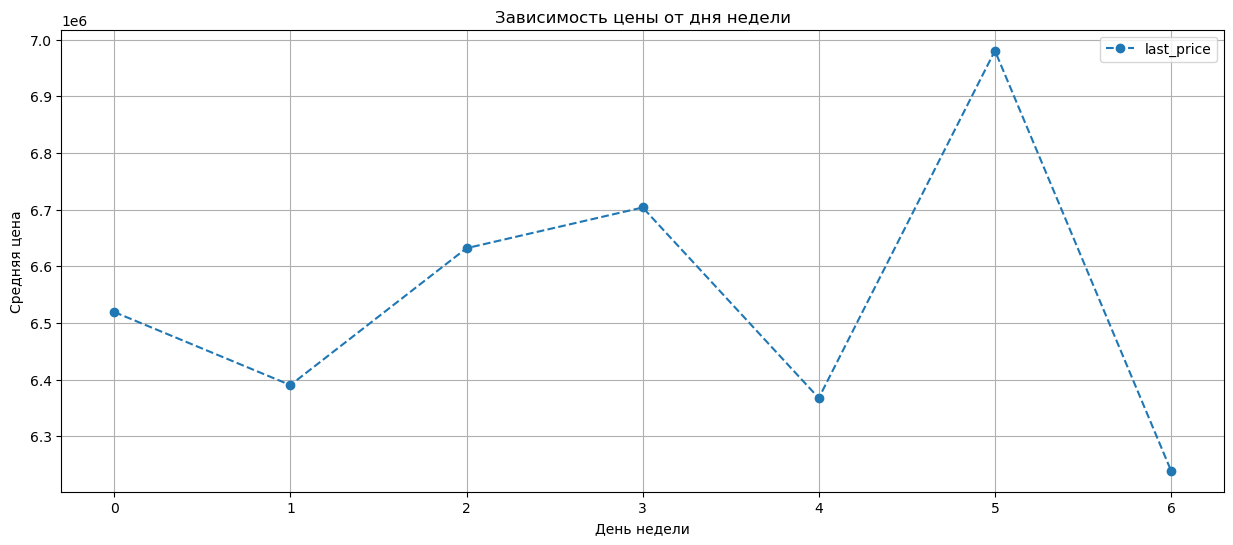

In [56]:
df_3 = data.copy() # зависимость от дня недели

df_3.pivot_table(index='day', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

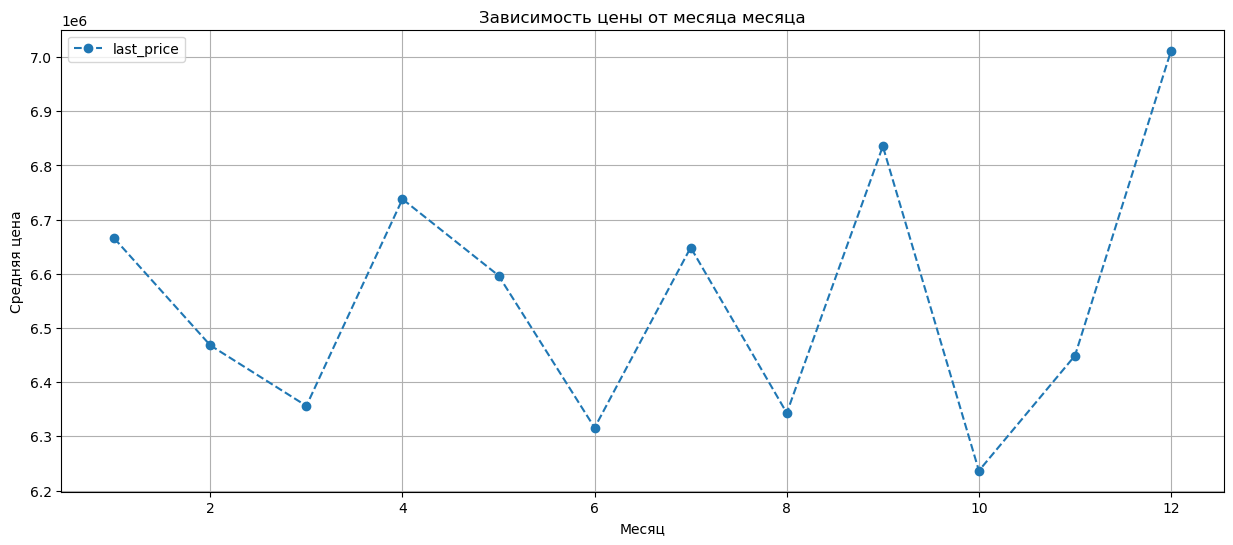

In [57]:
df_4 = data.copy() # зависимость от месяца

df_4.pivot_table(index='month', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Зависимость цены от месяца месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')

Text(0, 0.5, 'Средняя цена')

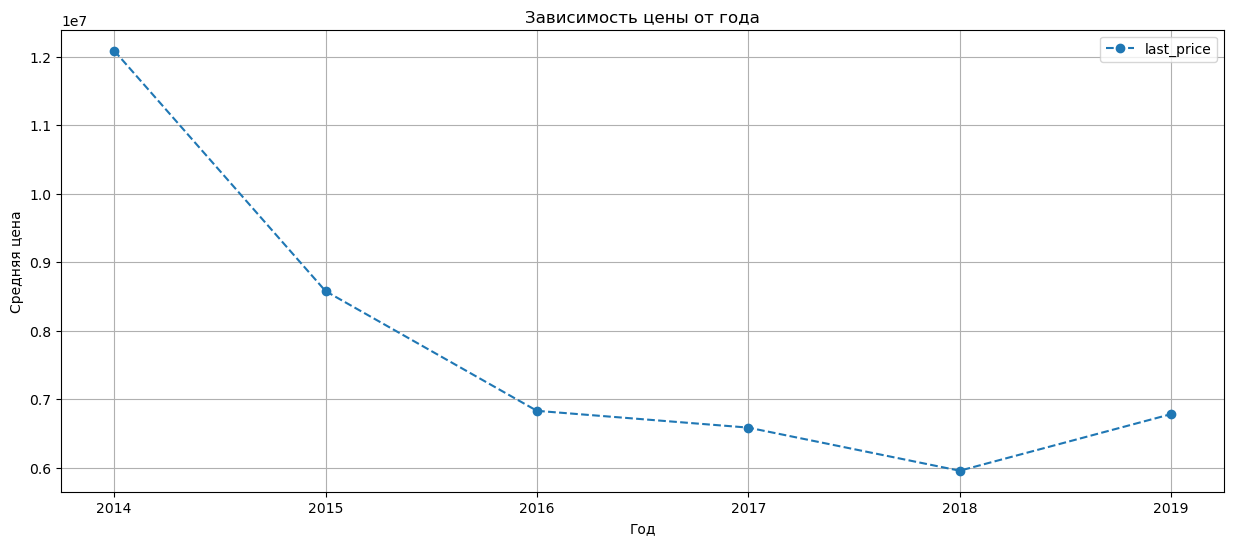

In [58]:
df_5 = data.copy() # зависимость от года

df_4.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Средняя цена')

Как выдно из графиков у недвижимости, объявления о продаже которых:

1) размещены в субботу - имееют максимальную цену. Также высокую цену имеет недвижимость, объявления о продаже которой размещены в среду и четверг.

2) С 2014 по 2018 года средняя цена на недвижимость снижается. При этом неьбольшой рост среденей цены налблюдается в с 2018 по 2019 год.

3) Самые высокие цены приведены в декабре месяце. При этом в остальные месяцы средняя цена на недвижимость постоянно коллебается с интервалом 2-3 месяца.

***Проверим 10 населенных пунктов с наибольшим количеством объявлений. 
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.***

In [59]:
data.pivot_table(index ='locality_name', 
                 values = 'price_for_sq_meter', 
                 aggfunc ={'mean' , 'count'}).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877341
посёлок Мурино,520,85673.259928
посёлок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Вывод. Наибошльшее число объявлений о продаже предствавлено в Санкт-Петербурге. Также В Санкт-Петербурге самая высокая стоимость квадратного метра. 
При этом самая низкая стоимость жилья представлена в Выборге.

***Рассмотрим стоимость жилья исходя из удаления от центра города.***

Добавим в таблицу столбец расстояние до центра в киллометрах и приведем к целочисленному значению. Для начала создадим отдельную таблицу для Санкт-Перербурга


In [60]:
data_spb = data.query('locality_name == "Санкт-Петербург"').copy()
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest']/1000

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,living_sq_share,kitchen_sq_share,day,month,year,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другое
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другое
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015,другое
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другое


Построим график зависимости средней стоимости квартиры от расстояния до центра. 

<Axes: xlabel='cityCenters_nearest_km'>

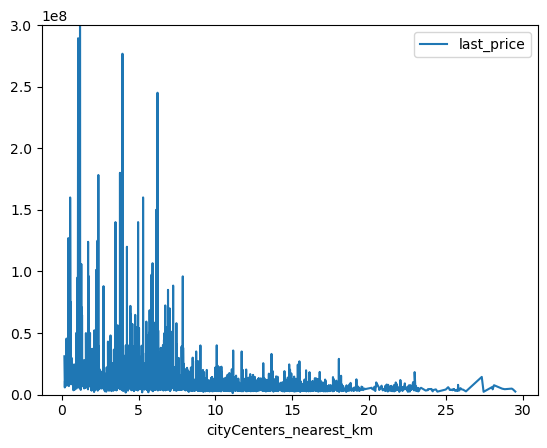

In [61]:
data_spb.pivot_table(index = 'cityCenters_nearest_km', 
                     values = 'last_price', 
                     aggfunc = 'mean').reset_index().plot(x = 'cityCenters_nearest_km', y = 'last_price', ylim = (0, 3e8))

Вывод. Радиус центра приблизительно равен 7 км, так как внутри содержутся самые высокие цены на недвижимость.

***Проанализируем сегмент квартир в центре Санкт-Петербурга.***

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

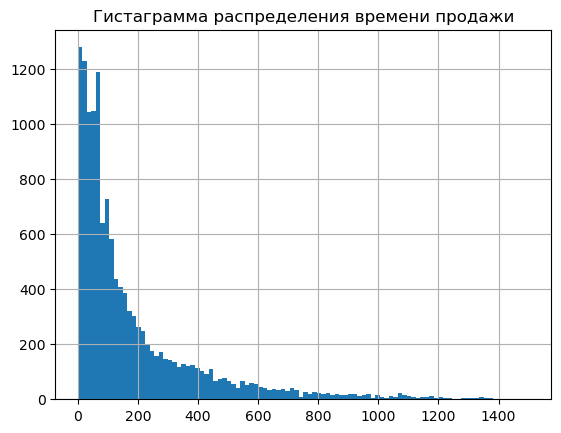

In [62]:
data_spb['days_exposition'].hist(bins = 100, range = (0,1500))
plt.title('Гистаграмма распределения времени продажи')
plt.show()

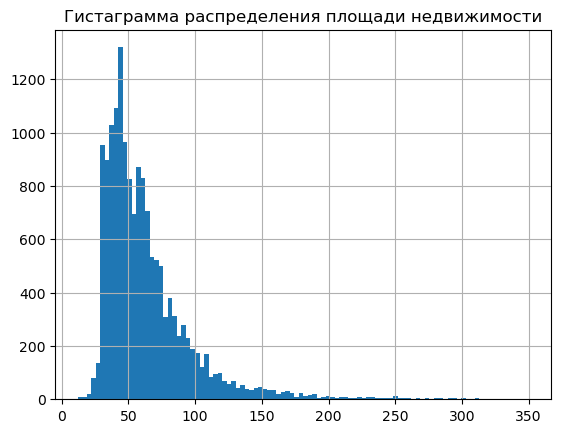

In [63]:
data_spb['total_area'].hist(bins = 100,range=(12,350))
plt.title('Гистаграмма распределения площади недвижимости')
plt.show()

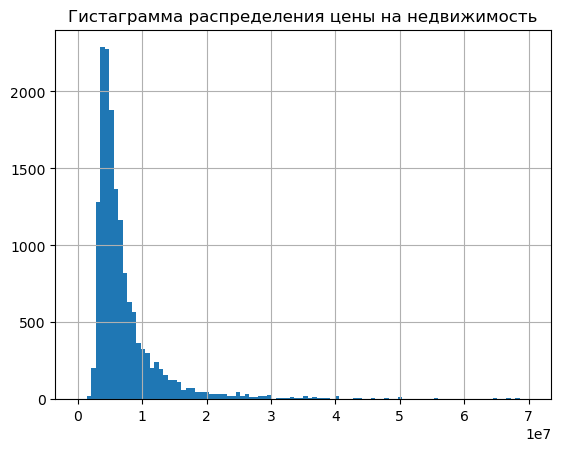

In [64]:
data_spb['last_price'].hist(bins = 100, range = (0, 7e7))
plt.title('Гистаграмма распределения цены на недвижимость')
plt.show()

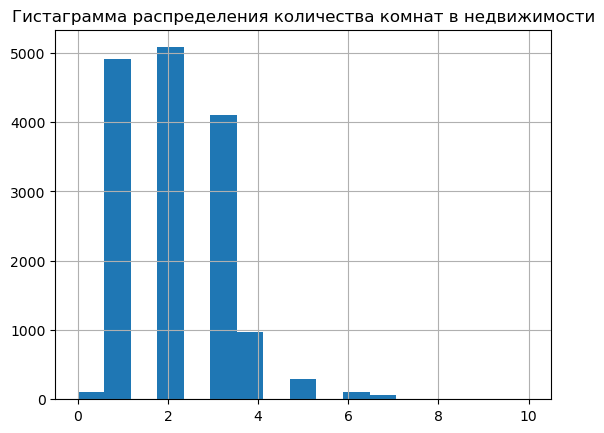

In [65]:
data_spb['rooms'].hist(bins = 17,range=(0,10))
plt.title('Гистаграмма распределения количества комнат в недвижимости')
plt.show()

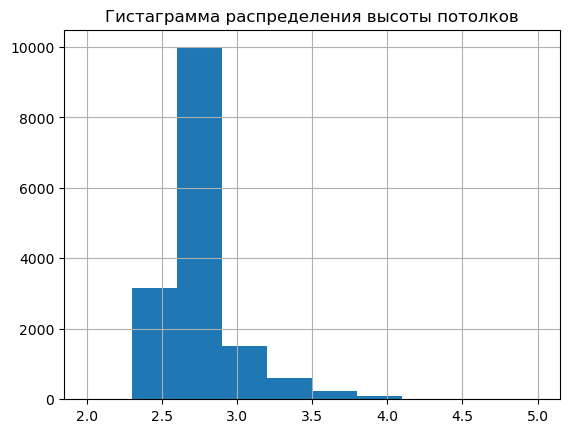

In [66]:
data_spb['ceiling_height'].hist(bins = 10,range=(2,5))
plt.title('Гистаграмма распределения высоты потолков')
plt.show()

In [67]:
data_spb[['days_exposition', 'total_area', 'last_price', 'rooms','ceiling_height']].describe()

,days_exposition,total_area,last_price,rooms,ceiling_height
count,13577.000000,15651.000000,1.565100e+04,15651.000000,15651.000000
mean,182.726965,64.746341,8.064895e+06,2.172385,2.749159
std,224.606142,40.426740,1.303626e+07,1.148437,1.044616
min,1.000000,12.000000,1.219000e+04,0.000000,1.000000
25%,42.000000,42.000000,4.200000e+06,1.000000,2.600000
50%,95.000000,55.000000,5.500000e+06,2.000000,2.650000
75%,231.000000,74.550000,8.150000e+06,3.000000,2.750000
max,1572.000000,900.000000,7.630000e+08,19.000000,100.000000


Для удобства приведем информацию по исходной таблице.

In [68]:
data[['days_exposition', 'total_area', 'last_price', 'rooms','ceiling_height']].describe()

,days_exposition,total_area,last_price,rooms,ceiling_height
count,20441.000000,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,180.884839,60.340678,6.540555e+06,2.071147,2.724581
std,219.685543,35.648988,1.090172e+07,1.078380,0.990085
min,1.000000,12.000000,1.219000e+04,0.000000,1.000000
25%,45.000000,40.000000,3.400000e+06,1.000000,2.600000
50%,95.000000,52.000000,4.650000e+06,2.000000,2.650000
75%,232.000000,69.800000,6.799000e+06,3.000000,2.700000
max,1580.000000,900.000000,7.630000e+08,19.000000,100.000000


Вывод. Общие значения по медианам имеются в столбцах по времени размещения объявлений, количеству комнат и высоте потолков.

При этом важно отметить, что:

1) Медианная цена за квартиру выше на 0,85 млн.руб.

2) Медианное значение общей площади на 3 м^2 больше, по сравнению с недвижимостью, не входящей в центр Санкт-Петербурга.

Проверим, влияют ли следующие факторы  на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

,last_price,ceiling_height,rooms,total_area,floor
last_price,1.000000,0.066417,0.372108,0.657090,-0.000586
ceiling_height,0.066417,1.000000,0.055934,0.086755,-0.021397
rooms,0.372108,0.055934,1.000000,0.758668,-0.161592
total_area,0.657090,0.086755,0.758668,1.000000,-0.037311
floor,-0.000586,-0.021397,-0.161592,-0.037311,1.000000


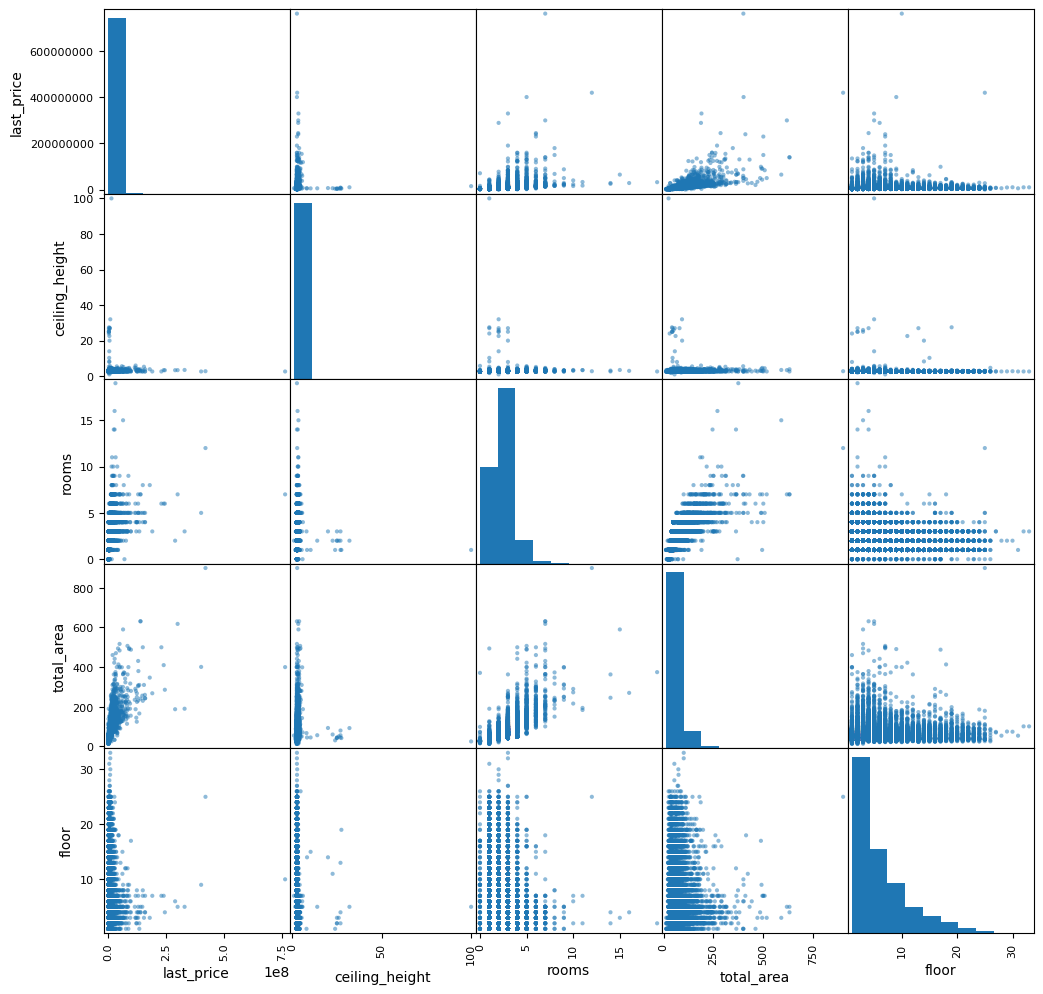

In [69]:
corr_table = data_spb[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table, figsize=(12,12))
display(corr_table.corr())

Вывод. На стоимость квартиры влияет ее общая площадь. При этом этаж и высота потолков не влияют на стоимость квартиры.


Проверим влияние на стоимость квартиры числа комнат, этажа, удалённости от центра и даты размещения объявления

/var/folders/7z/sf28v_h91tsfndytx6j96w0m0000gn/T/ipykernel_27927/1652529858.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(corr_table_2.corr())


,last_price,cityCenters_nearest,floor,rooms
last_price,1.000000,-0.259220,-0.000586,0.372108
cityCenters_nearest,-0.259220,1.000000,0.227782,-0.294018
floor,-0.000586,0.227782,1.000000,-0.161592
rooms,0.372108,-0.294018,-0.161592,1.000000


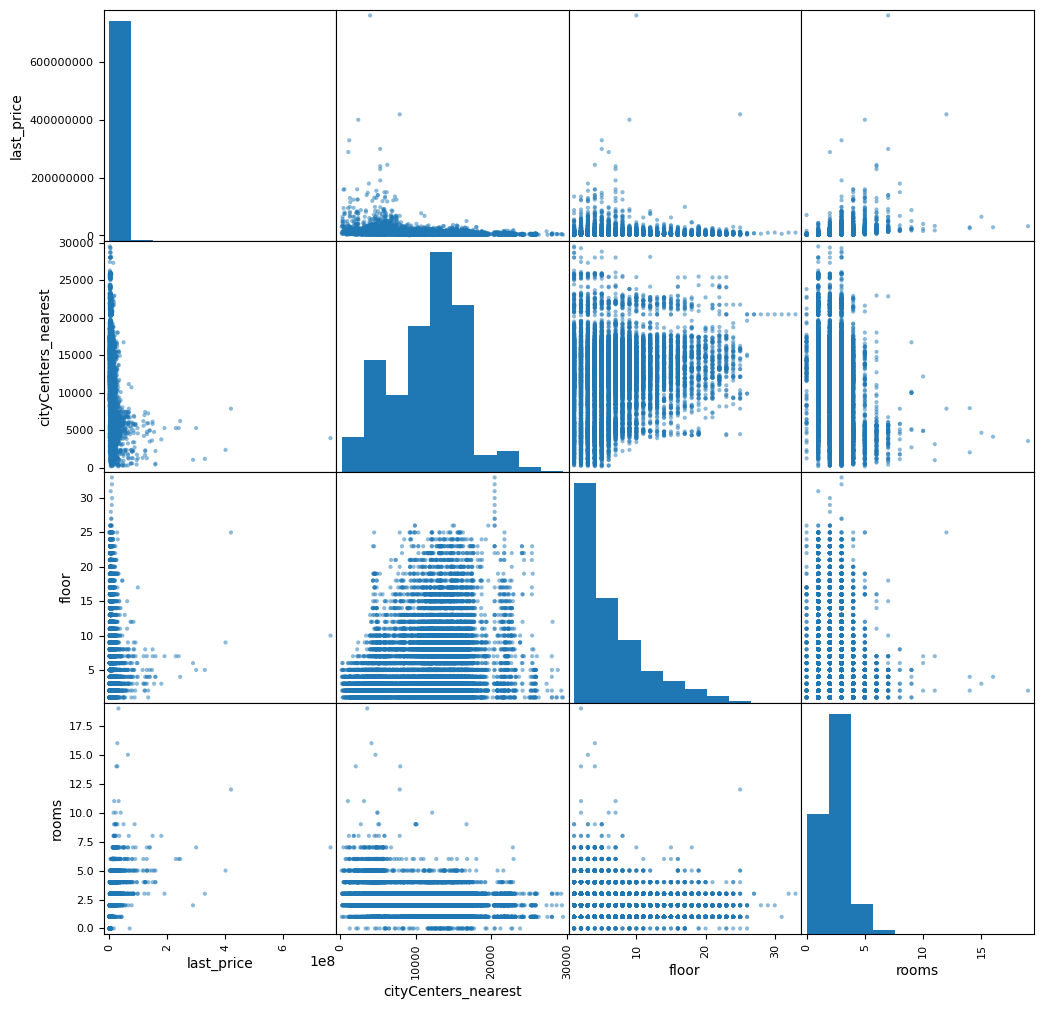

In [70]:
corr_table_2 = data_spb[['last_price','cityCenters_nearest','floor','rooms','first_day_exposition']]
pd.plotting.scatter_matrix(corr_table_2, figsize=(12,12))
display(corr_table_2.corr())

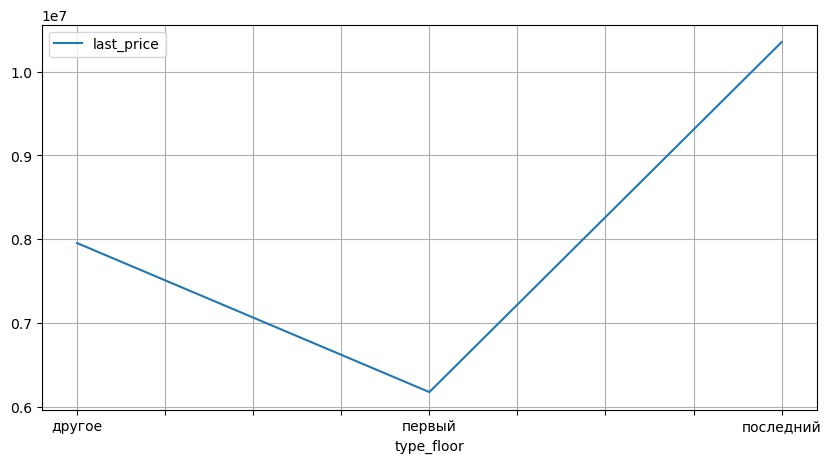

In [71]:
(
    data_spb.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, figsize=(10, 5))
) 

plt.show()

На цену квартиры влияет количество комнат (чем их больше, тем выше цена). Также чем ближе к центру квартира, тем она дорожа. При этом также квартиры на первом этаже самые дешевые.

## Общий вывод

В ходе проведенной работы по анализу различных факторов по влиянию на цену недвижимости было установлено следующее.

1) Наибольшее количество объявлений о продаже недвижимости размещены в Санк-Петербурге. Меньше всего в области в поселках/деревнях и селах.

2) Самые дорогая недвижимотсь предствалена в Санкт-Петербурге.

3) Центр Питера - область радиусом порядка 7 километров. 

4) Общие факторы для Санкт-Петербурга и области, которые влияют на стоимость недвижимости: общаяя площадь (чем больше площадь тем выше цена), удаленность от центра Санкт-Петербурга(чем ближе к центру, тем дороже).

5) Недвижимость на 1 этаже имеет самую низкую цену.

6) С 2014 года наблюдается тренд к снижению средней цены на недвижимость.